In [1]:
import pathlib
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
from peak_resolver.process_chromeleon import process_chromeleon_file

In [13]:
def get_fanny_concentration(file: pathlib.PosixPath):
    n = file.name
    conc = {'1':0.05, '2':0.1, '3': 0.2, '4':0.3, '5': 0.4, '6':0.5}
    return conc[n[1]]

def read_fanny_calib(p: pathlib.PosixPath, tmin=0, tmax=30, tgrid=None):
    files = p.glob('*.txt')
    acid = p.name.split(' ')[0].lower().capitalize()
    print(acid)
    data_list = []
    for file in files:
        data = process_chromeleon_file(file, tmin, tmax, tgrid = tgrid)
        data[acid] = get_fanny_concentration(file)
        data = data.set_index(['t', acid]).to_xarray()

        
        
        data_list.append(data)
    data = xr.combine_by_coords(data_list)
    savepath = str(p / acid) + '.nc'
    data.to_netcdf(savepath)
    return files, data, acid

In [14]:
path = Path('/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/')
path = path.resolve()
acids = [i for i in path.iterdir() if i.is_dir()]
acids = tuple(acids)

files = []
data = []
names = []
# [print(i.name) for i in acids]
for acid in acids:
    # print(acid.name)

    f, d, name = read_fanny_calib(acid, tmin=6.5, tmax=9, 
                            tgrid = np.linspace(0.15, 19.85, 5997)
                           )
    files.append(f)
    data.append(d)
    names.append(name)
    

Acetic
Butyric
Propanoic
Valeric
Caproic


In [16]:
path

PosixPath('/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves')

In [4]:
tmin = 6.5
tmax = 9
a_path, ace = read_fanny_calib(acids[0], tmin=tmin, tmax=tmax)
b_path, but = read_fanny_calib(acids[1], tmin=tmin, tmax=tmax)
p_path, pro = read_fanny_calib(acids[2], tmin=tmin, tmax=tmax)
v_path, val = read_fanny_calib(acids[3], tmin=tmin, tmax=tmax)
c_path, cap = read_fanny_calib(acids[4], tmin=tmin, tmax=tmax)

Acetic
Butyric
Propanoic
Valeric
Caproic


In [19]:
for n, ds in zip(names, data):
    print(n)
    print(ds.coords)
    q = n.upper() + ' ACID/' + n.lower() + '.nc'
    q = path / q
    ds.to_netcdf(q)

Acetic
Coordinates:
  * t        (t) float64 6.501 6.504 6.507 6.511 ... 8.988 8.991 8.995 8.998
  * Acetic   (Acetic) float64 0.05 0.1 0.2 0.3 0.4 0.5
Butyric
Coordinates:
  * t        (t) float64 6.501 6.504 6.507 6.511 ... 8.988 8.991 8.995 8.998
  * Butyric  (Butyric) float64 0.05 0.1 0.2 0.3 0.4 0.5
Propanoic
Coordinates:
  * t          (t) float64 6.501 6.504 6.507 6.511 ... 8.988 8.991 8.995 8.998
  * Propanoic  (Propanoic) float64 0.05 0.1 0.2 0.3 0.4 0.5
Valeric
Coordinates:
  * t        (t) float64 6.501 6.504 6.507 6.511 ... 8.988 8.991 8.995 8.998
  * Valeric  (Valeric) float64 0.05 0.1 0.2 0.3 0.4 0.5
Caproic
Coordinates:
  * t        (t) float64 6.501 6.504 6.507 6.511 ... 8.988 8.991 8.995 8.998
  * Caproic  (Caproic) float64 0.05 0.1 0.2 0.3 0.4 0.5


In [25]:
cp = xr.load_dataset('/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/CAPROIC ACID/Caproic.nc')


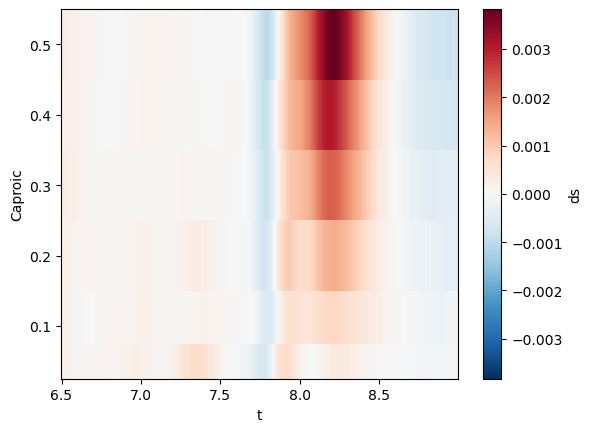

In [26]:
cp['ds'].dropna(dim='Caproic').plot(x='t')

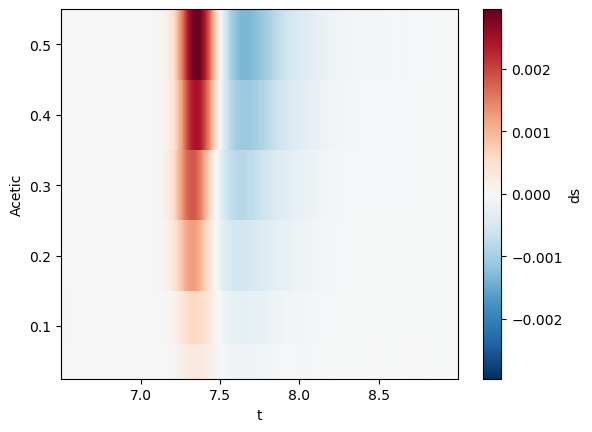

In [8]:
ace['ds'].plot(x='t')